In [1]:
import pandas as pd
df = pd.read_csv('Datasets/house-votes-84.csv')
df.head(5)

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [2]:
df.columns=['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']

In [3]:
import numpy as np

for i in range(df.shape[0]):
    for t in range(1, df.shape[1]):
        a=df.iloc[i,t]
        if a=='n':
            df.iloc[i,t]=0
        elif a=='y':
            df.iloc[i,t]=1
        else:
            df.iloc[i,t]=np.nan

In [4]:
df.head(1)

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN


In [5]:
missing = lambda x: round(x.fillna(x.mean()))
df.iloc[:, 1:] = df.iloc[:, 1:].transform(missing)
df.head(1)

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1


In [6]:
df['party'].isnull().value_counts()

False    434
Name: party, dtype: int64

In [7]:
columnList = df.columns
for i in range(1, len(columnList)):
    df[columnList[i]]= df[columnList[i]].astype('int64', inplace=True)

In [8]:
df.dtypes

party                object
infants               int64
water                 int64
budget                int64
physician             int64
salvador              int64
religious             int64
satellite             int64
aid                   int64
missile               int64
immigration           int64
synfuels              int64
education             int64
superfund             int64
crime                 int64
duty_free_exports     int64
eaa_rsa               int64
dtype: object

# 1)Classification 
-KNeighborsClassifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier
y=df['party'].values
X=df.drop('party', axis=1).values
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

#### We must use 2D array. So, we turn X_new_values into 2D array using reshape method. So, we make it have 1 row and 16 columns as a 2D array

In [10]:
X_new_values=np.array([0.696469,  0.286139,  0.226851,  0.551315,  0.719469,  0.423106,  0.980764, 0.68483, 0.480932,  0.392118,  0.343178 , 0.72905 , 0.438572 , 0.059678, 0.398044 , 0.737995])
X_new2 = X_new_values.reshape(1, -1)
'''
X_new_dict = {}
key = 0
for val in X_new_values:
    X_new_dict [key] = val
    key = key+1
X_new = pd.DataFrame(X_new_dict, index=[0])
'''

# Now, predict X_new
new_prediction = knn.predict(X_new2)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


## Digits Example from datasets

In [11]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 8, 8)
(1797, 64)


In [12]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
test_accuracy = knn.score(X_test, y_test)
print(test_accuracy)

0.9833333333333333


#### Incredibly, this out of the box k-NN classifier with 7 neighbors has learned from the training data and predicted the labels of the images in the test set with 98% accuracy, and it did so in less than a second! This is one illustration of how incredibly useful machine learning techniques can be.

### Predict 1010th image

#### First, We directly 1010th image from digits.images

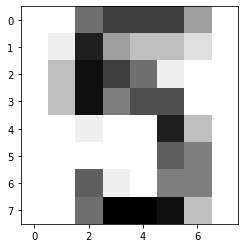

In [13]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

#### We can understand that the digit is 5. Secondly, We will predict the digit from 1010th row of digits.data

In [14]:
val = digits.data[1010]
digit = val.reshape(1, -1)

In [15]:
digit1010th = knn.predict(digit)
print('Prediction of 1010th digit: {}'.format(digit1010th))

Prediction of 1010th digit: [5]


#### As you above, we predicted 1010th image as 5 using knn that have 0.98% accuracy.

## Overfitting and underfitting
We contionue to use digits data.

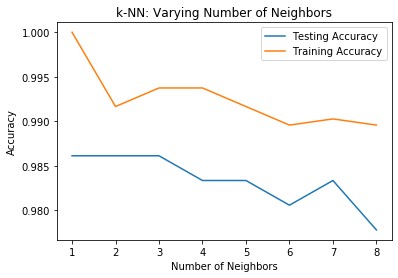

In [16]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.

### Confusion Matrix - different accuracy metric method in Classification

In [35]:
diabet = pd.read_csv('Datasets/diabetes.csv')
X_diabet = diabet.drop('diabetes', axis=1).values
y_diabet = diabet.diabetes.values
print(diabet.head(1))
print(diabet.shape)

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   

   diabetes  
0         1  
(768, 9)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report


# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X_diabet, y_diabet, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



true diabetes negative | false diabetes negative<br>
true diabetes pozitive | false diabetes pozitive<br>
As you above matrix, true diabetes negative is 176, false diabetes negative is 30, true diabetes pozitive is 56, false diabetes pozitive is 46.
<br>precision = true(positive or negative) / (true + false (positive or negative))
<br>recall = true positive / (true positive + false negative)     and    true negative / (true negative + false negative)
<br>f1score = 2.precision.recall / (precision + recall)
<br>High precision means that our classifier had a low false positive or negative rate, namely, not many diabetes pozitive were predicted as being diabetes negative, It may be the opposite. It is good.
<br>High recall means that our classifier predicted most positive or negative correctly. It is good.
<br>Below the report gives normal and weighted avarage

### Logistic Regression
Logistic regression is used in classification problem, not regression problem. Logistic regression works for binary classification.

In [64]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create the classifier: logreg
logreg = LogisticRegression(solver='liblinear') # liblinear is writteen for future warning. 

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[175  31]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       206
           1       0.68      0.65      0.66       102

    accuracy                           0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



#### In the same diabetes example, logistic regression outperform k-NN

### ROC Curve - different metric method for visually evaluate model.

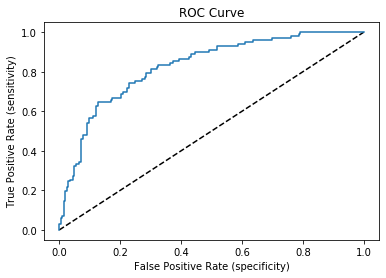

In [65]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
# Predict_proba returns an array with two to columns, each column contains the probability for the respective target values.
# we currrently inspect 1 column (positive situation)
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('ROC Curve')
plt.show()

This ROC curve provides a nice visual way to assess your classifier's performance. By default, logistic regression threshold equals 0.5, in fact, roc curve measures true and false rate acoording to change of threshold. 
<br>Threshold at (0, 0) point is 1, here both true or false positive rate is zero. When threshold equls 0.5, true positive rate is about 0.47, false positive rate is 0.1, on the other hand, optimum point for threshold probably 0.62 or 0.17
<br>In a Receiver Operating Characteristic (ROC) curve the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points. Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold. A test with perfect discrimination (no overlap in the two distributions) has a ROC curve that passes through the upper left corner (100% sensitivity, 100% specificity). Therefore the closer the ROC curve is to the upper left corner, the higher the overall accuracy of the test (Zweig & Campbell, 1993).

### cross validation score VS the area under ROC curve (AUC) score with train test split in logistic regression
You remember cross val uses defaultly R square metric method, but here we define scoring parameter as 'roc_auc'. 
<br>That is comparing two ways. 
<br>The First way is logreg supervise learning (fit() and predict() method), with train test split method of model selection, and with AUC score of metric method for accuracy.
<br>The Secoond way is logreg supervise learning (fit() and predict() method), with cross validation of model selection, and with AUC score of metric method for accuracy. 

In [66]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("logreg, train_test_split, AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X_diabet, y_diabet, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("logreg, cross_val_score, AUC : {}".format(cv_auc))

logreg, tarin_test_split, AUC: 0.8266228821625738
logreg, cross_val_score, AUC : [0.7987037  0.80777778 0.81962963 0.86603774 0.85037736]


### GridSearchCV - different model selection method with logistic regression
<br>GridSearchCV provides choosing best the parameter for the model that fit the data according to best score.
<br>In fact it is a type of cross validation model selection.
<br>Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: C. C controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large C can lead to an overfit model, while a small C can lead to an underfit model.

In [68]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg = LogisticRegression(solver='liblinear')

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X_diabet, y_diabet)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 19306.977288832535}
Best score is 0.7721354166666666


### Hold-out set in practice I: Classification
The idea is to tune the model's hyperparameters on the training set, and then evaluate its performance on the hold-out set which it has never seen before.
<br>We create training and test sets. The test set here will function as the hold-out set.

In [72]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(solver='liblinear')

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_diabet, y_diabet, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# 2) Decision Tree Classifier (different way to fit and predict method in supervise learning)

Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV instead of GridSearchCV that can be computationally expensive.

In [69]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_diabet, y_diabet)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 3}
Best score is 0.74609375


#### RandomizedSearchCV will never outperform GridSearchCV. Instead, it is valuable because it saves on computation time.

# 3)Regression (different way to fit and predict method in supervise learning)

   population  fertility  HIV       CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1  3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0  1.474353  22.25083   7103.0    130.1247  58.3   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  


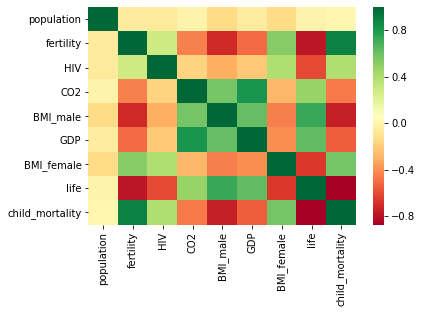

In [17]:
import seaborn as sns 
gap = pd.read_csv('Datasets/gm_2008_region.csv')
corr = gap.corr()
print(gap.head(2))
ax=sns.heatmap(corr, cmap='RdYlGn')

### a) Linear Regression

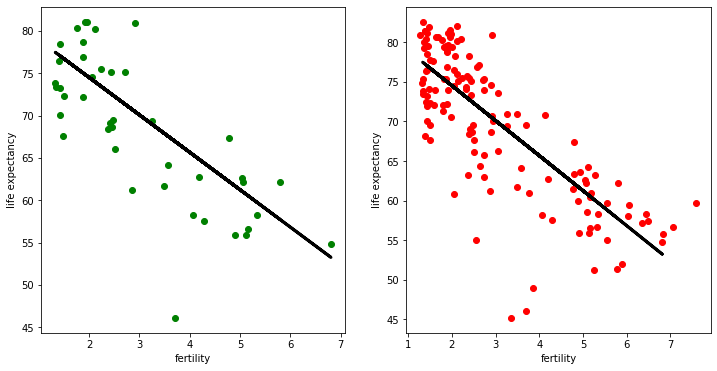

In [18]:
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

y = gap.life.values.reshape(-1, 1)
X = gap.fertility.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pre = reg.predict(X_test)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pre, color='black', linewidth=3)
plt.xlabel('fertility')
plt.ylabel('life expectancy')

plt.subplot(1,2,2)
plt.scatter(X, y, color='red')
plt.plot(X_test, y_pre, color='black', linewidth=3)
plt.xlabel('fertility')
plt.ylabel('life expectancy')
plt.show()

#### Two method of metric to evaluate, R square VS Root Mean Square Error 

In [19]:
from sklearn.metrics import mean_squared_error

# R square
accuracy_R_square = reg.score(X_test, y_test)

# root mean square error
accuracy_rmse = np.sqrt(mean_squared_error(y_test, y_pre))

print('R^2 : {}, rmse: {}'.format(accuracy_R_square, accuracy_rmse))

R^2 : 0.5506386342908549, rmse: 5.774506812035812


#### rmse is approximately 6, that means life expectancy value of regression can be thought +/-6.

### Cross Validation VS train_test_split in model selection
Difference beetwen cross val and train test is that cross val uses 1 and more different training and test set. Finally, cross val uses R square method for accuracy. 

In [20]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Average 5-Fold CV Score: 0.6168819644425119


### b) Lasso Regression
it is used to select out the most important feature for predicting while shrinking the coefficients of certain other features to 0.

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


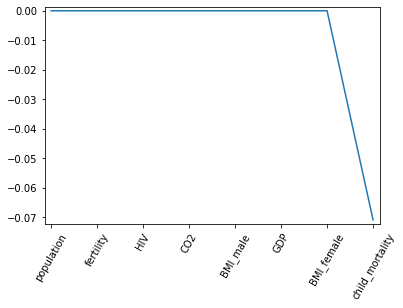

In [74]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

lasso_df = gap.drop(['life', 'Region'], axis=1)
X_lasso = lasso_df.values.reshape(-1, len(lasso_df.columns))

# Fit the regressor to the data
lasso.fit(X_lasso, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(lasso_df.columns)), lasso_coef)
plt.xticks(range(len(lasso_df.columns)), lasso_df.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

#### According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy. We can see this relationship in the corr table (heatmap).

### c) Ridge Regression
When building regression models, Ridge regression should be your first choice.

In [22]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, color='red', alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

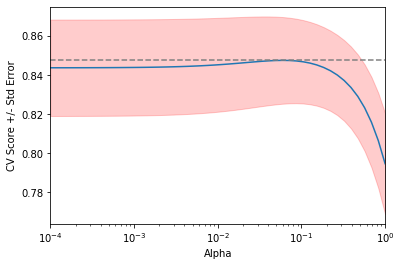

In [23]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X_lasso, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

#### How the cross-validation scores change with different alphas.

### Hold-out set in practice II: Regression
The idea is to tune the model's hyperparameters on the training set, and then evaluate its performance on the hold-out set which it has never seen before.
We create training and test sets. The test set here will function as the hold-out set.

In [75]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_lasso, y, test_size = 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282.48621758506545, tolerance: 0.558941590909091
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309.846639148627, tolerance: 0.5893071666666667
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255.50344008061322, tolerance: 0.5890250303030303
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.6728412633783, tolerance: 0.5814186865671

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460285
Tuned ElasticNet MSE: 10.05791413339843


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Preprocessing Data

### 1-) Exploring categorical features

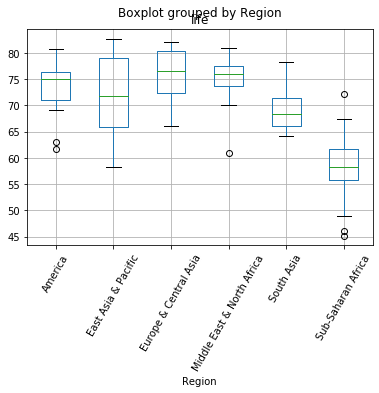

In [76]:
# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('Datasets/gm_2008_region.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

#### Exploratory data analysis should always be the precursor to model building.

### 2-) Creating dummy variables
Scikit-learn does not accept non-numerical features. But, 'Region' feature (non-numerical) contains very useful information that can predict life expectancy. So, we want to use this. To do this, you need to binarize it by creating dummy variables

In [77]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


#### We use the get_dummies() function again, this time specifying drop_first=True to drop the unneeded dummy variable (in this case, 'Region_America').

### 3-) Regression with categorical features

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

y_gap = df_region['life'].values
X_gap = df_region.drop('life', axis=1).values

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X_gap, y_gap, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


#### You now know how to build models using data that includes categorical features.

### 4-) Dropping missing data
In this example, missing data is encoded as '?'. Different datasets encode missing values in different ways. Sometimes it may be a '9999', other times a 0 - real-world data can be very messy!

In [37]:
df_vote = pd.read_csv('Datasets/house-votes-84.csv', header=None)
df_vote.columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df_vote[df_vote == 'n'] = 0
df_vote[df_vote == 'y'] = 1
# Convert '?' to NaN
df_vote[df_vote == '?'] = np.nan
df_vote.head(3)

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0


In [39]:
# Print the number of NaNs
print(df_vote.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df_vote.shape))

# Drop missing values and print shape of new DataFrame
df_vote_drop = df_vote.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df_vote_drop.shape))

print("\nOr we can use transform method, so we convert missing value into a value.\n")
df_vote_trans = df_vote
missing = lambda x: round(x.fillna(x.mean()))
df_vote_trans.iloc[:, 1:] = df_vote.iloc[:, 1:].transform(missing)
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df_vote_trans.shape))

party                0
infants              0
water                0
budget               0
physician            0
salvador             0
religious            0
satellite            0
aid                  0
missile              0
immigration          0
synfuels             0
education            0
superfund            0
crime                0
duty_free_exports    0
eaa_rsa              0
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (435, 17)

Or we can use transform method, so we convert missing value into a value.

Shape of DataFrame After Dropping All Rows with Missing Values: (435, 17)


 We use NaN because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as .dropna() and .fillna(), as well as scikit-learn's Imputation transformer Imputer().

### 5, 6-) Imputing missing data in a ML Pipeline
When many values in your dataset are missing, if you drop them, you may end up throwing away valuable information along with the missing data. It's better instead to develop an imputation strategy. This is where domain knowledge is useful, but in the absence of it, you can impute missing values with the mean or the median of the row or column that the missing value is in.

In [40]:
y_vote = df_vote.party.values
X_vote = df_vote.drop('party', axis=1)

In [42]:
# Import necessary modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values='NaN', strategy='most_frequent')),
        ('SVM', SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the train set
pipeline.fit(X_vote, y_vote)

# Predict the labels of the test set
y_pred = pipeline.predict(X_vote)

# Compute metrics
print(classification_report(y_vote, y_pred))

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

    democrat       0.98      0.95      0.96       267
  republican       0.92      0.97      0.94       168

    accuracy                           0.96       435
   macro avg       0.95      0.96      0.95       435
weighted avg       0.96      0.96      0.96       435



### 7-) Centering and scaling your data

In [21]:
import pandas as pd
wine = pd.read_csv('Datasets/white-wine.csv')
print(wine.isnull().sum())
wine.quality = wine.quality < 5
y_wine = wine.quality
X_wine = wine.drop('quality', axis=1).values
wine.head(1)

fixed acidity           3
volatile acidity        3
citric acid             2
residual sugar          4
chlorides               0
free sulfur dioxide     1
total sulfur dioxide    0
density                 3
pH                      3
sulphates               0
alcohol                 0
quality                 0
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,False


In [28]:
# Import scale
from sklearn.preprocessing import scale 

wine_clean = wine.dropna()
X_wine_unscale = wine_clean.drop('quality', axis=1).values

# Scale the features: X_scaled
X_scaled = scale(X_wine_unscale)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(X_wine_unscale.mean())) 
print("Standard Deviation of Unscaled Features: {}".format(X_wine_unscale.std()))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(X_scaled.mean())) 
print("Standard Deviation of Scaled Features: {}".format(X_scaled.std()))

Mean of Unscaled Features: 18.43269676956036
Standard Deviation of Unscaled Features: 41.543702320628036
Mean of Scaled Features: 1.845716823293375e-15
Standard Deviation of Scaled Features: 1.0


#### Notice the difference in the mean and standard deviation of the scaled features compared to the unscaled features.

In [29]:
# Import the necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

y_wine_clean = wine_clean.quality
X_wine_clean = wine_clean.drop('quality', axis=1).values

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_wine_clean, y_wine_clean, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.9637978142076503
Accuracy without Scaling: 0.9583333333333334


#### It looks like scaling has significantly improved model performance!

### *** Bringing it all together I: Pipeline for classification *** 

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_wine_clean, y_wine_clean, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9549180327868853
              precision    recall  f1-score   support

       False       0.95      1.00      0.98       932
        True       0.00      0.00      0.00        44

    accuracy                           0.95       976
   macro avg       0.48      0.50      0.49       976
weighted avg       0.91      0.95      0.93       976

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.01}


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Specify the hyperparameter space using the following notation: 'step_name__parameter_name'.

### * Bringing it all together II: Pipeline for regression *

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]
         
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_wine, y_wine)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.85168783420581, tolerance: 0.010442756508422637
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54.564675795277054, tolerance: 0.011373537519142357
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64.74465742227999, tolerance: 0.01339987752602565
  p

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.0658558622612816


C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.21546564212026, tolerance: 0.01761627194773372
  positive)
